In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [106]:
import os

In [107]:
import pylab_util as PU

In [108]:
import serial

In [109]:
import serial_utils

In [110]:
import importlib

In [111]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/ryanwkrauss/git/research/serial_utils.py'>

In [112]:
import re

In [113]:
p = re.compile("^[0-9.]+,.*")

In [114]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [115]:
pwd

'/home/ryanwkrauss/sabbatical_github_work/arduino_oop_block_diagram'

In [116]:
ls /dev/tty*

/dev/tty  /dev/ttyACM0


## Get the portname

In [117]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM0


In [118]:
ser = serial_utils.serial_test(portname)

In [119]:
ser.open()

In [120]:
ser.print_all()

Autogen RC OL code
using rtblockdiagram library
enter any character to start a test



In [121]:
ser.flush()

In [122]:
ser.write_char('s')

In [123]:
data = ser.get_data()

In [124]:
data2 = ser.get_data()

In [125]:
data += data2

In [126]:
print(data)

t0 =1582888
0.42,0,0
2.29,0,0
4.34,0,0
6.39,0,0
8.44,0,0
10.48,0,0
12.53,0,0
14.58,0,0
16.63,0,0
18.68,0,0
20.72,0,0
22.77,0,0
24.82,0,0
26.87,0,0
28.92,0,0
30.96,0,0
33.01,0,0
35.06,0,0
37.11,0,0
39.16,0,0
41.20,0,0
43.25,0,0
45.30,0,0
47.35,0,0
49.40,0,0
51.44,0,0
53.49,0,0
55.54,0,0
57.59,0,0
59.64,0,0
61.68,0,0
63.73,0,0
65.78,0,0
67.83,0,0
69.88,0,0
71.92,0,0
73.97,0,0
76.02,0,0
78.07,0,0
80.12,0,0
82.16,0,0
84.21,0,0
86.26,0,0
88.31,0,0
90.36,0,0
92.40,0,0
94.45,0,0
96.50,0,0
98.55,0,0
100.60,100,0
102.64,100,23
104.69,100,55
106.74,100,83
108.79,100,109
110.84,100,134
112.88,100,156
114.93,100,176
116.98,100,194
119.03,100,211
121.08,100,226
123.12,100,241
125.17,100,254
127.22,100,266
129.27,100,277
131.32,100,287
133.36,100,296
135.41,100,305
137.46,100,312
139.51,100,320
141.56,100,326
143.60,100,332
145.65,100,338
147.70,100,342
149.75,100,348
151.80,100,352
153.84,100,356
155.89,100,359
157.94,100,362
159.99,100,365
162.04,100,368
164.08,100,371
166.13,100,373
168.18,100,37

In [127]:
float_array = data_to_float_array(data)

In [128]:
t = float_array[:,0]

In [129]:
if t[0] > 500:
    t[0] = 0

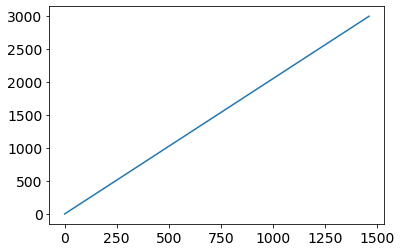

In [130]:
plt.figure()
plt.plot(t)

In [131]:
dt_array = t[1:]-t[0:-1]

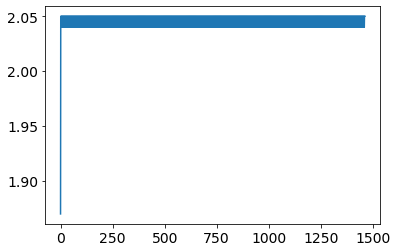

In [132]:
plt.figure()
plt.plot(dt_array)

In [133]:
v_in = float_array[:,-2]
v_out = float_array[:,-1]

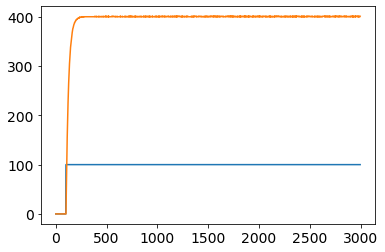

In [134]:
plt.figure()
plt.plot(t, v_in, t, v_out)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

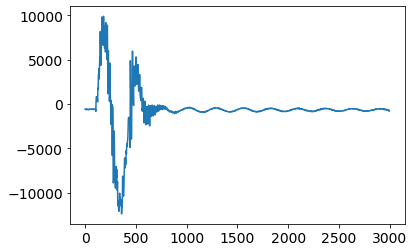

In [181]:
plt.figure()
plt.plot(t, az)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

In [104]:
ser.close()

In [34]:
data_out = float_array

In [359]:
np.savetxt(fn,data_out,delimiter=',')